# Final Project

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")

working_dir = '/content/drive/My Drive/3162 - Final Project'

Mounted at /content/drive


In [ ]:
cd '$working_dir'

/content/drive/My Drive/3162 - Final Project


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

# Data Understanding/Data Visualization

In [ ]:
df = pd.read_csv("candy-data.csv")
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
sns.pairplot

<function seaborn.axisgrid.pairplot>

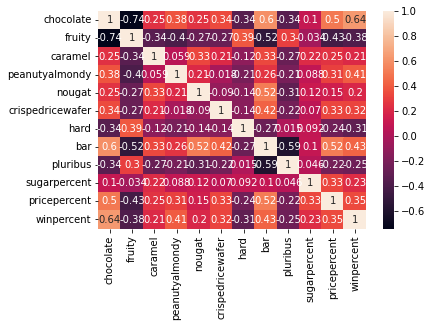

In [ ]:
sns.heatmap(df.corr(), annot=True)

# Preprocessing

In [ ]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(85, 13)

Experiment 1 - Deals with Clustering and PCA

# Modeling

In [ ]:
X = df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
pca_ft = pca.fit_transform(X)
num_components = range(pca.n_components_)
all_var = np.sum(pca.explained_variance_ratio_)
print(all_var)

0.6119102487084788


In [ ]:
import sklearn.metrics as metrics
df_silhouette = pd.DataFrame({'ss_score':[],'n_cluster':[]})
for i in range(2,10):
    km = KMeans(n_clusters = i, init = 'random', max_iter = 50, n_init = 10, random_state = 42)
    cluster_labels = km.fit_predict(pca_ft)
    ss_avg = metrics.silhouette_score(pca_ft, cluster_labels)
    df_silhouette = df_silhouette.append({'ss_score':ss_avg, 'n_cluster':i}, ignore_index = True)

,ss_score,n_cluster
0,0.550706,2.0
1,0.607687,3.0
2,0.679615,4.0
3,0.650165,5.0
4,0.628105,6.0
5,0.590510,7.0
6,0.616925,8.0
7,0.670318,9.0


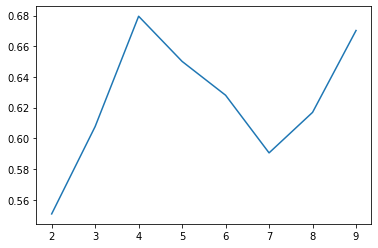

In [ ]:
display(df_silhouette)
df_silhouette.set_index('n_cluster', inplace = True)
plt.plot(df_silhouette['ss_score'])

The silhouette score suggests that I should have 4 clusters since it has the highest score. 

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_ft)

KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.labels_

array([1, 1, 3, 3, 3, 1, 1, 2, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 3, 3, 3, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 3, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 2, 3, 3, 0, 3, 1, 2, 1, 0, 1, 3, 3, 0, 3, 2],
      dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-0.88325443,  0.07018395],
       [ 1.1061048 , -0.16531318],
       [ 0.11292916,  0.73734672],
       [-0.35778414, -0.64356446]])

In [ ]:
X['cluster_label'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X['cluster_label'].unique()

array([1, 3, 2, 0], dtype=int32)

In [ ]:
X_km_mean = X.copy()

In [ ]:
X_km_mean.groupby('cluster_label').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
cluster_label,,,,,,,,,
0,0.000000,0.962963,0.000000,0.000000,0.00,0.000000,0.296296,0.00,1.0
1,0.960000,0.000000,0.320000,0.400000,0.28,0.240000,0.000000,0.84,0.0
2,0.705882,0.000000,0.176471,0.235294,0.00,0.058824,0.000000,0.00,1.0
3,0.062500,0.750000,0.187500,0.000000,0.00,0.000000,0.437500,0.00,0.0


The result showed what kind of flavours of candies these clusters are composed of by getting the mean of the flavours that belong to each clusters.

For cluster 0, we can see that all of the candies in this cluster are pluribus and 96% of them are fruity so we can say if any candy are pluribus and fruity then they belong to this cluster. Similarly, for cluster 1, 96% of the candies in this cluster are chocolate and 84% of them are bar so we can say if any candies are chocalate and bar candy then they belong to this cluster. For cluster 2, all of the candies in this cluster are pluribus and about 70.5% of them are chocolate so we can say if any candies are pluribus candy and chocolate then they belong to this cluster. For cluster 3, we can see that 75% of candies in this cluster are fruity and 43.7% of them are hard so I would say if any candies are fruity and kind of hard then they would belong to this cluster. 

In [ ]:
pca_df = pd.DataFrame(pca_ft)

In [ ]:
y = kmeans.fit_predict(X)

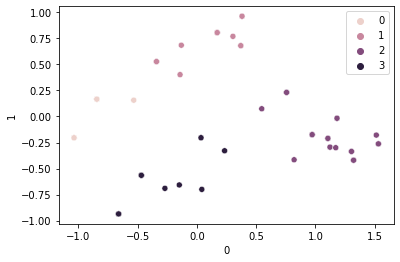

In [ ]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue =y )

In [ ]:
#pca_df

In [ ]:
#inertia = []
#for k in range(1,8):
   # kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    #inertia.append(np.sqrt(kmeans.inertia_))

In [ ]:
#plt.plot(range(1, 8), inertia, marker='s');
#plt.xlabel('$k$')
#plt.ylabel('Variance')

In [ ]:
#create KMeans model
#kmeans = KMeans(n_clusters=3, random_state=356).fit(X)

In [ ]:
#y = kmeans.fit_predict(X)

In [ ]:
#sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

Experiment 2 - Recommender Systems

In [ ]:
temp_df = df.copy()
temp_df['candy_id'] = temp_df.index + 1

a = temp_df.drop(['candy_id', 'competitorname', 'sugarpercent', 'pricepercent', 'winpercent'], axis=1)
cos_sim = cosine_similarity(a, a)

In [ ]:
results = {}
for idx, row in temp_df.iterrows():
    similar_indices = cos_sim[idx].argsort()[:-100:-1]
    similar_items = [(cos_sim[idx][i], temp_df['candy_id'].iloc[[i]].tolist()[0])
                     for i in similar_indices]
    results[row['candy_id']] = similar_items[1:]

In [ ]:
def get_name(a_id):
    return temp_df[temp_df['candy_id'] == a_id]['competitorname'].tolist()[0].split(' - ')[0]
  
def recommend(item_id, N):
    print(f"Recommending {N} candy similar to {get_name(item_id)} ...")
    print("---------------------")
    
    recs = results[item_id][:N]
    for rec in recs:
        print(f"\tRecommended with a score {rec[0]}:\t{get_name(rec[1])} ")

In [ ]:
recommend(44, 5)

Recommending 5 candy similar to Nestle Crunch ...
---------------------
	Recommended with a score 1.0000000000000002:	Kit Kat 
	Recommended with a score 1.0000000000000002:	Nestle Crunch 
	Recommended with a score 0.8660254037844388:	100 Grand 
	Recommended with a score 0.8660254037844388:	Twix 
	Recommended with a score 0.816496580927726:	Tootsie Roll Snack Bars 


# Evaluation
We will caculate the RMSE (Root Mean Square Error) to evaluation our model.

In [ ]:
survey_df = pd.read_csv("surveys.csv")
survey_df.head()

,selected_candy,candy_1,similar_1,score_1,candy_2,similar_2,score_2,candy_3,similar_3,score_3
0,Twix,Sickers Crsiper,0.894427,0.6,Kit Kat,0.866025,0.6,Nestle Crunch,0.866025,0.6
1,Dum Dums,Lemonhead,1.000000,0.7,Warheads,1.000000,1.0,Ring pop,1.000000,0.5
2,3 Musketeers,Charleston Chew,1.000000,1.0,Milky Way,0.866025,0.6,Milky Way Midnight,0.866025,0.6
3,ReeseÕs Miniatures,ReeseÕs stuffed with pieces,1.000000,0.7,Nestle Butterfinger,0.816497,0.9,Peanut M&Ms,0.816497,0.5
4,Baby Ruth,Snickers,1.000000,1.0,Milky Way,0.894427,0.9,Milky Way Midnight,0.894427,0.9


In [ ]:
def rmse(index):
  row = survey_df.iloc[[index]]
  val = 0.0
  val += (row["similar_1"] - row["score_1"])**2
  val += (row["similar_2"] - row["score_2"])**2
  val += (row["similar_3"] - row["score_3"])**2
  val = math.sqrt(val/3.0)
  return val

def avg_rmse():
  total = 0.0
  len = survey_df.shape[0]
  for i in range(len):
    total += rmse(i)
  return total/float(len)

avg_rmse()

0.22792409021854318

# References
- https://www.researchgate.net/profile/Wasim-Ali-3/post/How_to_evaluate_a_pure_content-based_recommender_system/attachment/6140f8d02897145fbd70e632/AS%3A1068023075057665%401631647952652/download/1-s2.0-S1110866515000341-main.pdf